## Wine Reviews
Initial exploration to get to know the data.

### Data Sources

Source: Kaggle [Wine Reviews](https://www.kaggle.com/datasets/zynicide/wine-reviews)

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("christopheiv/winemagdata130k")

print("Path to dataset files:", path)

Path to dataset files: /Users/patrick/.cache/kagglehub/datasets/christopheiv/winemagdata130k/versions/1


## Understanding the Data

**Libraries**

In [4]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [5]:
fname = 'winemag-data-130k-v2.csv'
reviews = pd.read_csv(os.path.join(path, fname), index_col=0)
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


#### Understanding the point scale
from [WineEnthusiast](https://www.wineenthusiast.com/ratings/)

<p align="center">
<img src="images/points.png" alt="drawing" width="1000"/>
</p>

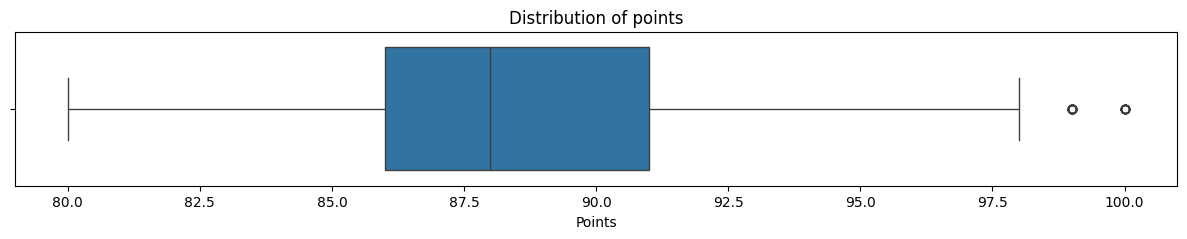

In [6]:
# box plot of points
fig, ax = plt.subplots(figsize=(15, 2))
ax = sns.boxplot(reviews, x='points', orient='h')
ax.set_title('Distribution of points')
ax.set_xlabel('Points')
plt.show()

**Conclusion**: No outlier. All point ratings in expected range. *High* quality wines are wines with scores above $90$.

#### Understanding Price

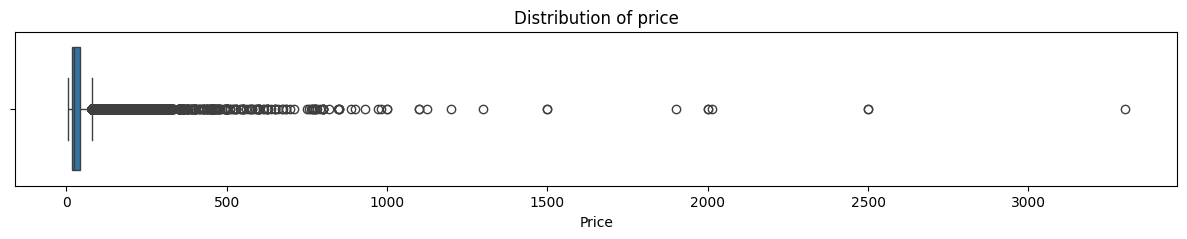

In [7]:
# box plot of price
fig, ax = plt.subplots(figsize=(15, 2))
ax = sns.boxplot(reviews, x='price', orient='h')
ax.set_title('Distribution of price')
ax.set_xlabel('Price')
plt.show()

In [8]:
print(f'{reviews.query('price <= 500').shape[0]:,d}', 'are reviews of wines costing less than $500')
price_stats = reviews['price'].describe()
print(f'{reviews.query(f'price >= {price_stats['25%']} and price <= {price_stats['75%']}').shape[0]:,d}', 'are reviews of wines costing between', f'${price_stats['25%']:.02f} and ${price_stats['75%']:.02f}')
price_stats

120,884 are reviews of wines costing less than $500
62,623 are reviews of wines costing between $17.00 and $42.00


count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

**Price Categories**

<p align="center">
<img src="images/price_band.jpg" alt="drawing" width="500"/>
</p>

Updated price bands from [Bottle Barn](https://bottlebarn.com/blogs/news/fine-premium-and-luxury-the-categories-of-wine) wine retailer:

``` text
The pricing bands might look like this: value wine ($4–$12), popular ($13–$16), premium ($17–22), super premium ($23–$30), ultra-premium ($30–$50), luxury ($50–$100), super luxury ($100–$200) and icon ($200 or more).
```


In [9]:
reviews.loc[reviews.price <= 12, 'Price Band'] = 'value'
reviews.loc[(reviews.price >= 13) & (reviews.price <= 16), 'Price Band'] = 'popular'
reviews.loc[(reviews.price >= 17) & (reviews.price <= 22), 'Price Band'] = 'premium'
reviews.loc[(reviews.price >= 23) & (reviews.price <= 30), 'Price Band'] = 'super'
reviews.loc[(reviews.price >= 31) & (reviews.price <= 50), 'Price Band'] = 'ultra'
reviews.loc[(reviews.price >= 51) & (reviews.price <= 100), 'Price Band'] = 'luxury'
reviews.loc[(reviews.price >= 101) & (reviews.price <= 200), 'Price Band'] = 'super luxury'
reviews.loc[(reviews.price >= 201), 'Price Band'] = 'icon'

reviews['Price Band'].value_counts().to_frame()

,count
Price Band,
ultra,27746
super,22525
premium,22281
luxury,16408
popular,16377
value,12272
super luxury,2684
icon,682


**Conclusion**: No outlier. All prices seem realistic and valid.

#### Understanding Wine Variety

In [10]:
# count of reviews by varietal
reviews_by_varietal = reviews.groupby('variety')[['title']].count().rename(columns={'title': 'count'}).sort_values('count', ascending=-False)
reviews_by_varietal

,count
variety,
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Tempranillo-Malbec,1
Malbec-Carménère,1
Malagouzia-Chardonnay,1


**Observations**: Long tail of infrequent blends, like `Tempranillo-Malbec`. Consider varietals with more than 100 reviews.

In [11]:
varietals_with_many_reviews = reviews_by_varietal.query('count > 100')
varietals_with_many_reviews

,count
variety,
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Viura,107
Bonarda,105
Sagrantino,104


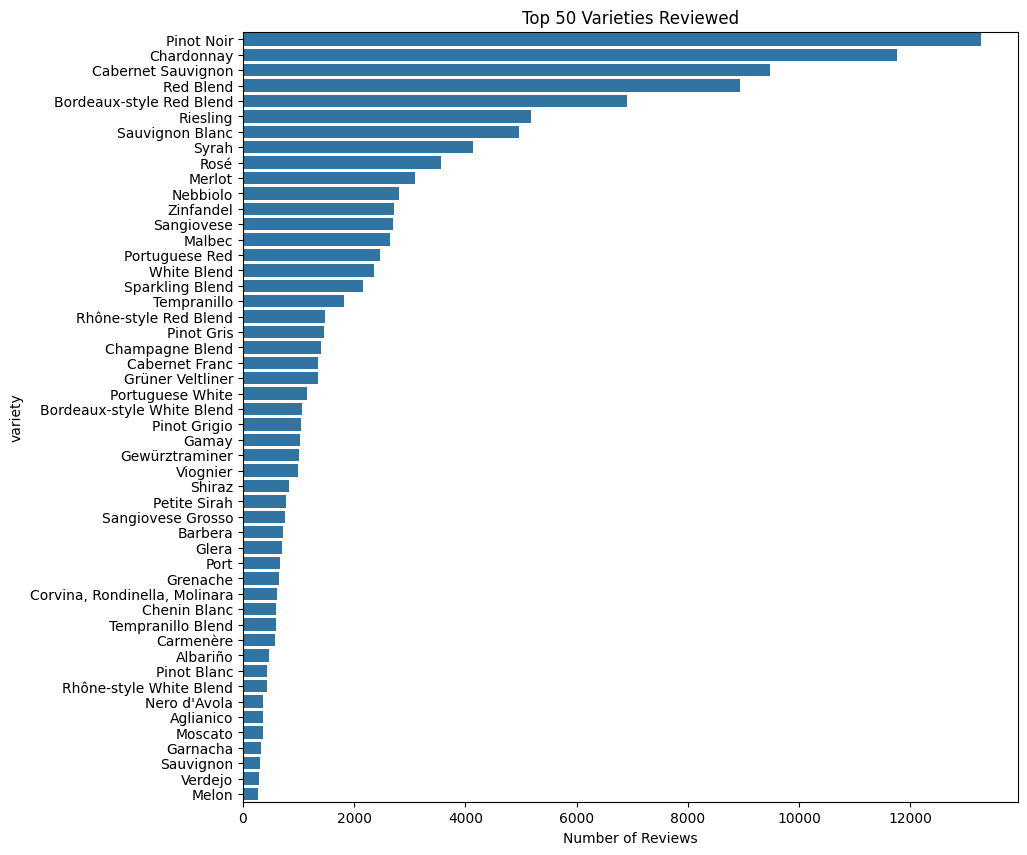

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
n = 50
sns.barplot(varietals_with_many_reviews.head(n), y=varietals_with_many_reviews.head(n).index, x='count')
ax.set_title(f'Top {n} Varieties Reviewed')
ax.set_xlabel('Number of Reviews')
plt.show()

In [13]:
print(f'The top {n} reviewed varieties account for {varietals_with_many_reviews.head(n)['count'].sum():,d} reviews, which is {varietals_with_many_reviews.head(n)['count'].sum()/reviews.shape[0]:.1%} of all the reviews.')

The top 50 reviewed varieties account for 115,439 reviews, which is 88.8% of all the reviews.


**Classification of Wine Variety**

The wine varieties can be classified into three type of varieties: `Red`, `White`, and `Sparkling`. We can augment the data by classifying the type of wine variety.

In [14]:
# define the white wine varieties
white = {
  'Chardonnay', 'Riesling', 'Sauvignon Blanc', 'White Blend', 'Pinot Gris', 'Grüner Veltliner', 'Portuguese White', 
  'Bordeaux-style White Blend', 'Pinot Grigio', 'Gewürztraminer', 'Viognier', 'Glera', 'Chenin Blanc', 'Albariño', 
  'Pinot Blanc', 'Rhône-style White Blend', 'Moscato', 'Sauvignon', 'Verdejo', 'Melon', 'Rosé'
}

# verify that white wine varieties are valid
top_varieties = set(varietals_with_many_reviews.head(n).index.to_list())
assert white.issubset(top_varieties), 'invalid white wine variety'

# define the sparkling wine varieties
sparkling = {'Sparkling Blend', 'Champagne Blend'}

# verify that sparkling wine varieties are valid
assert sparkling.issubset(top_varieties), 'invalid sparkling wine variety'

# remaining wines are all red wines
red = top_varieties - white - sparkling

# verify that red wine varieties are valid
assert red.union(white).union(sparkling) == top_varieties, 'invalid red wine variety'

#### Understanding country of origin

**Why the country of origin for the wine matters**

<img src="images/old_new_world_wines.jpg" alt="drawing" width="500"/>

From [The difference between Old World and New World wines](https://www.lucariscrystal.com/the-difference-between-old-world-and-new-world-wines) and [The Real Differences Between New World and Old World Wine](https://winefolly.com/deep-dive/new-world-vs-old-world-wine/):
- Old World refers to countries in Europe, the Mediterranean, and some in the Middle East. This includes: France, Spain, Italy, Germany, Portugal, Austria, Greece, Lebanon, Israel, Croatia, Georgia, Romania, Hungary and Switzerland.
- New World refers to territories where viniculture was introduced from Europe during the colonization period, including the U.S., New Zealand, Argentina, Chile, Australia and South Africa.
- Old World regions, especially those in Europe, are cooler than regions in the New World. This means that the grapes don’t ripen as much, resulting in more light-bodied wines with high acidity and low alcohol content.
- In contrast, New World regions have warmer climates, which means riper grapes which contain more sugar. This delivers a full-bodied, fruity, low acidity, and high alcohol wine.

In [15]:
reviews_by_country = reviews.groupby('country')[['title']].count().rename(columns={'title':'count'}).reset_index().sort_values('count', ascending=False)
reviews_by_country

,country,count
40,US,54504
15,France,22093
22,Italy,19540
37,Spain,6645
31,Portugal,5691
8,Chile,4472
0,Argentina,3800
3,Austria,3345
2,Australia,2329
17,Germany,2165


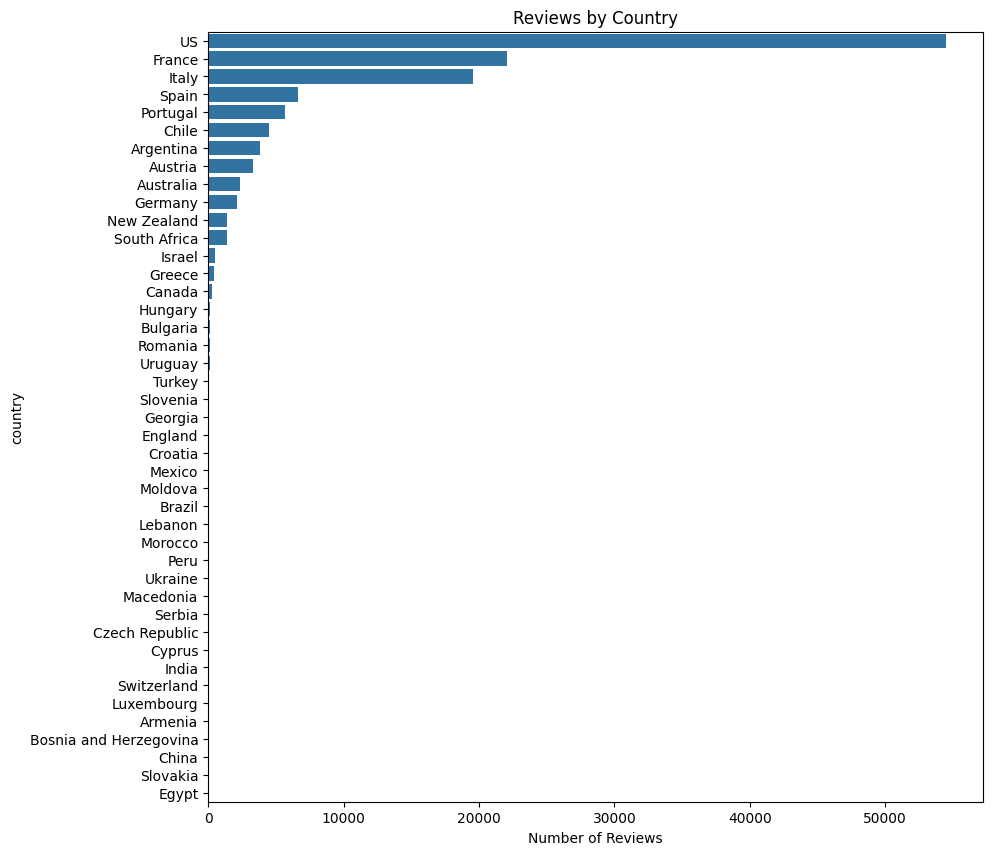

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(reviews.groupby('country')[['title']].count().rename(columns={'title':'count'}).reset_index().sort_values('count', ascending=False), y='country', x='count')
ax.set_title(f'Reviews by Country')
ax.set_xlabel('Number of Reviews')
plt.show()

In [17]:
cut_off = 200
print(f'The top {reviews_by_country.query(f'count > {cut_off}').shape[0]} countries with wines reviewed account for {reviews_by_country.query(f'count > {cut_off}')['count'].sum():,d} reviews, or {reviews_by_country.query(f'count > {cut_off}')['count'].sum()/reviews.shape[0]:.1%} of all reviews.')
top_countries = reviews_by_country.query(f'count > {cut_off}').country.to_list()
top_countries

The top 15 countries with wines reviewed account for 128,632 reviews, or 99.0% of all reviews.


['US',
 'France',
 'Italy',
 'Spain',
 'Portugal',
 'Chile',
 'Argentina',
 'Austria',
 'Australia',
 'Germany',
 'New Zealand',
 'South Africa',
 'Israel',
 'Greece',
 'Canada']

In [18]:
# assign top countries to old and new world classification
old_world = {'France','Italy','Spain','Portugal','Austria','Germany','Israel','Greece'}
new_world = {'US','Chile','Argentina','Australia','New Zealand','South Africa','Canada'}

# verify all countries have been classified
assert old_world.union(new_world) == set(top_countries)

# distribution of reviews between old world and new world wines
num_old_world = reviews_by_country.query('country in @old_world')['count'].sum()
num_new_world = reviews_by_country.query('country in @new_world')['count'].sum()
num_top_countries = reviews_by_country.query('country in @top_countries')['count'].sum()

print(f'{num_new_world/num_top_countries:.1%}', 'of the reviews from the top countries are new world wines coming from countries like the US.')

pd.DataFrame({'count': [num_old_world, num_new_world]}, index=['old world', 'new world'])

53.0% of the reviews from the top countries are new world wines coming from countries like the US.


,count
old world,60450
new world,68182


#### Understanding the title

All reviews have a title. The title appears to contain additional useful information, specifically the vintage year.

In [19]:
reviews[['title', 'winery', 'variety', 'country', 'province', 'points', 'price']].head()

,title,winery,variety,country,province,points,price
0,Nicosia 2013 Vulkà Bianco (Etna),Nicosia,White Blend,Italy,Sicily & Sardinia,87,NaN
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,Portuguese Red,Portugal,Douro,87,15.0
2,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,Pinot Gris,US,Oregon,87,14.0
3,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,Riesling,US,Michigan,87,13.0
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,Pinot Noir,US,Oregon,87,65.0


In [20]:
# use regex to extract vintage year from title field
import re
title_pattern = re.compile(r'\D(19[0-9]{2}|20[0-9]{2})')
title = reviews.loc[0, 'title']
m = title_pattern.findall(title)
print(f'The vintage year "{m[-1]}" is extracted from the title "{title}".')

The vintage year "2013" is extracted from the title "Nicosia 2013 Vulkà Bianco  (Etna)".


#### Understanding Winery Location Fields

In [21]:
reviews[['winery', 'country', 'province', 'region_1', 'region_2']].describe()

,winery,country,province,region_1,region_2
count,129971,129908,129908,108724,50511
unique,16757,43,425,1229,17
top,Wines & Winemakers,US,California,Napa Valley,Central Coast
freq,222,54504,36247,4480,11065


In [22]:
reviews[['winery', 'country', 'province', 'region_1', 'region_2']].head()

,winery,country,province,region_1,region_2
0,Nicosia,Italy,Sicily & Sardinia,Etna,NaN
1,Quinta dos Avidagos,Portugal,Douro,NaN,NaN
2,Rainstorm,US,Oregon,Willamette Valley,Willamette Valley
3,St. Julian,US,Michigan,Lake Michigan Shore,NaN
4,Sweet Cheeks,US,Oregon,Willamette Valley,Willamette Valley


In [23]:
reviews[reviews.province == 'Other'].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Price Band
16,Argentina,"Baked plum, molasses, balsamic vinegar and che...",Felix,87,30.0,Other,Cafayate,NaN,Michael Schachner,@wineschach,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,Felix Lavaque,super
183,Argentina,With attractive melon and other tropical aroma...,NaN,88,12.0,Other,Salta,NaN,Michael Schachner,@wineschach,Alamos 2007 Torrontés (Salta),Torrontés,Alamos,value
245,Argentina,Not exactly a world-class white wine but at le...,Reserve,85,12.0,Other,San Juan,NaN,Michael Schachner,@wineschach,Finca Las Moras 2007 Reserve Chardonnay (San J...,Chardonnay,Finca Las Moras,value
728,Argentina,Initial aromas of lychee and jasmine are varie...,Reserva,85,17.0,Other,Salta,NaN,Michael Schachner,@wineschach,Terrazas de Los Andes 2015 Reserva Torrontés (...,Torrontés,Terrazas de Los Andes,premium
735,Argentina,"Oily, gritty aromas of almond skins set up a p...",Don David Reserve,85,17.0,Other,Calchaquí Valley,NaN,Michael Schachner,@wineschach,El Esteco 2015 Don David Reserve Torrontés (Ca...,Torrontés,El Esteco,premium


**Conclusions**: Most reviews have winery, country, and province values. `region_2` is not useful. `region_1` fields may be useful in identifying wine growing regions in certain parts of the world. The winery will be primarily located based on country, and province. The wine region information contained in the fields `province`, `region_1` and `region_2` will be reduced into a single `location` field.

**TODO**: Get geolocation coordinates of for `winery` locations

#### Understanding the Wine Designation

In [24]:
reviews[reviews.designation.notna()][['title', 'variety', 'designation', 'winery', 'country', 'province', 'points', 'price']]

,title,variety,designation,winery,country,province,points,price
0,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Vulkà Bianco,Nicosia,Italy,Sicily & Sardinia,87,NaN
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Avidagos,Quinta dos Avidagos,Portugal,Douro,87,15.0
3,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,Reserve Late Harvest,St. Julian,US,Michigan,87,13.0
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Vintner's Reserve Wild Child Block,Sweet Cheeks,US,Oregon,87,65.0
5,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Ars In Vitro,Tandem,Spain,Northern Spain,87,15.0
...,...,...,...,...,...,...,...,...
129964,Domaine Ehrhart 2013 Domaine Saint-Rémy Herren...,Gewürztraminer,Domaine Saint-Rémy Herrenweg,Domaine Ehrhart,France,Alsace,90,NaN
129965,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Seppi Landmann Vallée Noble,Domaine Rieflé-Landmann,France,Alsace,90,28.0
129966,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Brauneberger Juffer-Sonnenuhr Spätlese,Dr. H. Thanisch (Erben Müller-Burggraef),Germany,Mosel,90,28.0
129968,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Kritt,Domaine Gresser,France,Alsace,90,30.0


In [25]:
print(f'{reviews.designation.isna().sum()/reviews.shape[0]:.1%}', 'of the reviews are missing designation')
reviews[reviews.designation.notna()].designation.describe()

28.8% of the reviews are missing designation


count       92506
unique      37979
top       Reserve
freq         2009
Name: designation, dtype: object

**Conclusions**: `Designation` appear to be winery branded names and labels for the wine with too many unique values. Not useful in classification. Also, too many reviews are missing values. Not worth imputing.

#### Understanding Taster information

Taster name and twitter handles are provided for some of the reviews.

In [26]:
reviews[reviews.taster_name.notna()][['title', 'taster_name', 'taster_twitter_handle']]

,title,taster_name,taster_twitter_handle
0,Nicosia 2013 Vulkà Bianco (Etna),Kerin O’Keefe,@kerinokeefe
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Roger Voss,@vossroger
2,Rainstorm 2013 Pinot Gris (Willamette Valley),Paul Gregutt,@paulgwine
3,St. Julian 2013 Reserve Late Harvest Riesling ...,Alexander Peartree,NaN
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Paul Gregutt,@paulgwine
...,...,...,...
129966,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Anna Lee C. Iijima,NaN
129967,Citation 2004 Pinot Noir (Oregon),Paul Gregutt,@paulgwine
129968,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Roger Voss,@vossroger
129969,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Roger Voss,@vossroger


In [27]:
# reviews where taster name is provided but no twitter handle
reviews_without_twitter = reviews[reviews.taster_name.notna() & reviews.taster_twitter_handle.isna()][['title', 'taster_name', 'taster_twitter_handle']]
taster_without_twitter = reviews_without_twitter.taster_name.unique()
print(f'{reviews_without_twitter.shape[0]:,d} reviews by {len(taster_without_twitter)} reviewers don\'t have twitter handles')
print(f'{reviews[reviews.taster_name.notna()].shape[0]:,d} reviews ({reviews[reviews.taster_name.notna()].shape[0]/reviews.shape[0]:.1%}) have a taster specified.')
reviews.query('taster_name in @taster_without_twitter').taster_twitter_handle.describe()


4,969 reviews by 3 reviewers don't have twitter handles
103,727 reviews (79.8%) have a taster specified.


count       0
unique      0
top       NaN
freq      NaN
Name: taster_twitter_handle, dtype: object

In [28]:
print(f'{reviews[reviews.taster_name.isna() & reviews.taster_twitter_handle.notna()].shape[0]}', 'review has a twitter handle without a taster name.')

0 review has a twitter handle without a taster name.


**Conclusions**: The `taster_twitter_handle` field can be dropped. Most reviews have a taster provided.

### Understanding the Description

This is the key field from which features corresponding to the traits of the wine being reviewed will be extracted. It is expected that patterns of similar words will surface, which will enable an algorithm to predict the quality of wines based on their variety.

**Why the description matters**

Different types of wine are expected to express different types of flavors. Consider `Pinot Noir`, which is a red wine. It is considered a light bodied red wine with black fruit and earthy notes.

<div center="align">
  <img src="images/common-types-of-wine-by-wine-folly.jpg" alt="wines" height="40"/>
  <img src="images/Pinot-Noir-wine-profile-glass.jpg" alt="wines" height="40"/>
  <img src="images/pinot-noir-flavors.png" alt="pinot noir" height="40"/>
</div>

Other types of wines may differ in terms of how light or full-bodied they are, how sweet or acidic, and express different flavors and notes. See the following for a summary of the major wine categories:
- [The 9 Primary Styles of Wine](https://winefolly.com/deep-dive/everything-you-need-to-know-about-wine-in-9-bottles/)
- [Learn Wine With The 9 Major Styles](https://winefolly.com/tips/the-9-major-wine-styles/)
- [Common Types of Wine (The Top Varieties)](https://winefolly.com/deep-dive/common-types-of-wine/)
- [Identifying Flavors in Wine](https://winefolly.com/deep-dive/identifying-flavors-in-wine/)
- [The Different Types of Wine](https://winefolly.com/deep-dive/different-types-of-wine/)
- [Wines Listed from Dry to Sweet](https://winefolly.com/tips/wines-listed-dry-sweet/)

The 9 Styles of Wine are:
- Full-Bodied Red Wines
- Medium-Bodied Red Wines
- Light-Bodied Red Wines
- Rosé Wines
- Full-Bodied White Wines
- Light-Bodied White Wines
- Aromatic White Wines
- Dessert & Fortified Wines
- Champagne & Sparkling Wines

In [29]:
from IPython.display import Markdown, display

description = reviews.sample(1, random_state=23).description.values[0]

display(Markdown('**Sample Description:**' + '\n\n'+ f'{description}'))


**Sample Description:**

For an affordable, ready-to-drink bottling, this twist-top wine, which gets a touch of Sémillon, shows ripe nectarine, Pink Lady apple, lime water and grapefruit pith on the nose. The palate offers baking soda and lemon-lime flavors, along with tart apple skins and grassy notes.

**Extract Features from Text Description**

Use natural language processing to extract features, e.g. vector of words, from description.

In [30]:
import nltk
import wordcloud as wc

# downloand the natudal language processing toolkit
nltk.download('all');

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/patrick/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/patrick/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/patrick/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/patrick/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/patrick/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]  

{'apple': 1.0, 'lime': 1.0, 'affordable': 0.5, 'ready': 0.5, 'drink': 0.5, 'bottling': 0.5, 'twist': 0.5, 'top': 0.5, 'wine': 0.5, 'gets': 0.5, 'touch': 0.5, 'Sémillon': 0.5, 'shows': 0.5, 'ripe': 0.5, 'nectarine': 0.5, 'Pink': 0.5, 'Lady': 0.5, 'water': 0.5, 'grapefruit': 0.5, 'pith': 0.5, 'nose': 0.5, 'palate': 0.5, 'offers': 0.5, 'baking': 0.5, 'soda': 0.5, 'lemon': 0.5, 'flavors': 0.5, 'along': 0.5, 'tart': 0.5, 'skins': 0.5, 'grassy': 0.5, 'notes': 0.5}


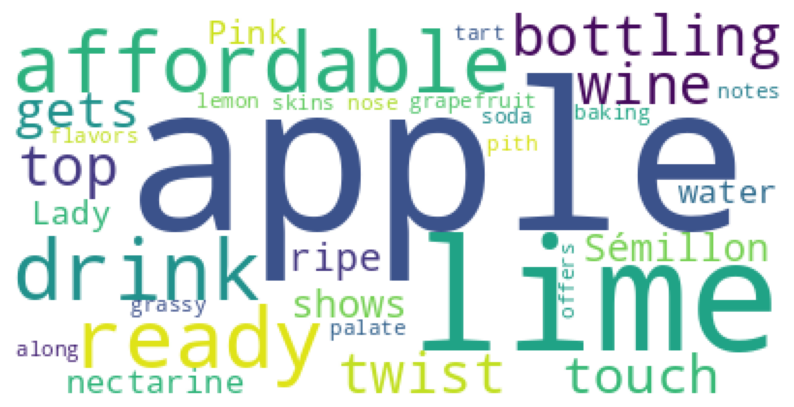

In [31]:
# helper Function for display frequency of words
def freq_words(words, title=''):
  '''
  Show frequency of words as an image
  '''
  # Generate frequency of words as an image
  freq_words_img = wc.WordCloud(background_color='white', random_state=2).generate(words)

  # print the vector of words extracted from the description
  print(freq_words_img.words_)

  # Display the image
  plt.figure(figsize=(10, 10))
  plt.title(title)
  plt.imshow(freq_words_img)
  plt.axis("off")
  plt.show()

# show a word cloud of the features extracted from the description
freq_words(description)

## Missing Data

In [32]:
reviews.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
Price Band                8996
dtype: int64

In [33]:
print(f'{reviews.price.isna().sum()/reviews.shape[0]:.1%}', 'of the reviews are missing price data.')

6.9% of the reviews are missing price data.


**Observations**

 - Some reviews are missing wine prices. Given the distribution of prices, this is a quantity that can be imputed.
 - 63 reviews are missing countries or provinces, 1 is missing the variety value. These can be dropped.
 - The missing values in the other location fields are going to be handled by calculating the `location` field. Missing locations may possibly be imputed.
 - Some title may not provide vintage year. It may be necessary to drop reviews without vintage.

## Duplicate Data

In [34]:
reviews.nunique()

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
Price Band                    8
dtype: int64

There appear to be duplicate `title` and `description` values.

In [35]:
duplicate_reviews = reviews.groupby(['title', 'description'])[['points']].count().rename(columns={'points': 'count'}).reset_index().sort_values('count', ascending=False).query('count > 1')
duplicate_reviews

,title,description,count
40062,Domaines Devillard 2015 Domaine des Perdrix (...,From vines in the vineyards behind the Côtes d...,2
28037,Château de Saint Martin 2015 Cuvée Grand Réser...,"This wine is soft, gently fruity with light ra...",2
112449,Veuve Clicquot Ponsardin NV Demi-Sec (Champagne),Demi-Sec is essentially an off-dry Champagne. ...,2
69166,Lomas del Valle 2012 Coast Cool Climate Pinot ...,Piercing sour raspberry aromas introduce an ed...,2
28007,Château de Rhodes 2012 Red (Gaillac),"Made from organic grapes, this wine blends eve...",2
...,...,...,...
19479,Castle Rock 2014 Sauvignon Blanc (Mendocino),Aromas like dried herbs and flavors like green...,2
33629,D.R. Stephens 2007 D.R. II Cabernet Sauvignon ...,"A solid, good Cabernet, with very ripe, extrac...",2
21262,Charles Heidsieck NV Brut Réserve (Champagne),"Balanced and rich with apple flavors, this is ...",2
88493,Prospect 772 2012 The Truant G-S-M (Sierra Foo...,"Full bodied and bold flavored, this is not ove...",2


Examine one of the duplicate titles

In [36]:
reviews.query(f'title == "{duplicate_reviews.iloc[0, 0]}" and description == "{duplicate_reviews.iloc[0, 1]}"')[['title', 'description', 'winery', 'variety', 'points', 'price']]

,title,description,winery,variety,points,price
21497,Domaines Devillard 2015 Domaine des Perdrix (...,From vines in the vineyards behind the Côtes d...,Domaines Devillard,Chardonnay,87,38.0
57520,Domaines Devillard 2015 Domaine des Perdrix (...,From vines in the vineyards behind the Côtes d...,Domaines Devillard,Chardonnay,87,38.0


**Conclusions**:

Some of the reviews appear to be duplicates. Duplicate values will be dropped.

# Summary

## Interpretation of Features in Dataset

The dataset contains $5$ key types of features related to wine reviews. They include:
1. Vintage: the year the grapes were harvested to make the wine being reviewed, extracted from the `title` field.
1. `description`: the description of the wine provided by an experienced industry wine taster identifying the aromas, flavors, and characteristics detected by the reviewer. This is the critical data from which features will be extracted via natural language processing.
1. `variety`: the type of wine varietal or blend. This can be augmented to classify the type of wine as red, white or sparkling.
1. Wine origin: the `winery` that produced the wine, including the `country`, `province` and another field `region_1` to identify the wine region where the wine was made.
1. Reviewer: `taster_name` indicates the experienced wine industry taster that reviewed the wine

The dataset also includes columns that are not useful in this analysis. These fields will be dropped:
- `taster_twitter_handle`: an alternate identifier for the taster that reviewed the wine. Dropped because it is redundant.
- `region_2`: sparsely populated, too many missing values, often redundant when specified. Dropped because they are too many missing values, and the values that exist are redundant.
- `designation`: the marketing designation assigned to the wine by the winery. Too many values to be useful for classification. Dropped because there are too many missing values, and the values are unique when specified meaning that they are not very informative for classification or prediction applications.

The target features are `points` and `price`.

## Focusing on data with multiple samples

- Focus on the top $50$ wine varieties
- Focus on countries with more than $200$ reviews
- Focus on reviews with a taster specified. 

## Handling Missing Values

- A few reviews are missing `variety`, `country` or `province`. These samples will be dropped.
- Roughly $16%$ of the reviews are missing the taster. It may be interesting to run the analysis with and without reviewer to determine whether there is bias or valuable information contained in `taster_name`. This is not a value that seems can be imputed. Perhaps a value like *Unknown* can be specified.
- `price` is missing quite a lot of values. However, given the very narrow distribution of price data, this is a value that lends itself well to being imputed.
- `region_1` missing values may not matter given that most reviews have valid `province` values, which makes this field optional.
- The other columns with missing data `designation`, `region_2`, `taster_twitter_handle` are all being dropped.

## Handling Duplicate Data

Several reviews appear to be duplicated. Duplicate values will be dropped to avoid unduly influencing the impact of the duplicated descriptions.

## Data Augmentation
- The vintage `year` can be extracted from the `title` field. The dataset will be augmented to contain the `year` field.
- The wine `quality` will be derived from the `points` value. Wines rated $90$ points or above will be rated as *high*, while those between $80$ and $90$ will be rated *medium*. 
- The `variety` of the wine can be classified into one of the $9$ styles of wine, such as red, white, or sparkling. The dataset will be augmented to contain the `wine_style` field, as well as a simpler classification `type` variant.
- The `winery`'s location is encoded in the `country`, `province`, `region_1` and `region_2` fields. However, the `province`, `region_1` and `region_2` fields are not very clean. There are many missing values in the `region_1` and `region_2` fields, and some `province` values are not useful requiring `region_1` to be used. The `province`, `region_1` and `region_2` fields will be processed and reduced to a single `location` field.
- The `classification` field will be added to designate whether the wine is an *old* or *new* world wine.
- Add a `price band` classification to group wines by cost.
- Time permitting, the geolocation pinpointing the location where the wine being review originates based on the `winery`, `country`, and `location` fields will be encoded in `lat`, `lon` fields for the `winery`.

# Next step
- [data cleaning](wine_review-data_cleaning.ipynb)